### В данной работе реализуем градиентный спуск для вывода шаблонов фильтров слоев модели VGG16

Выводим первые 64 фильтра слоев block1_conv1, block2_conv1, block3_conv1, block4_conv1.</br>
Изображения выводятся в размере 64x64 в сетке 8x8.

Шаблоны фильтров из слоя block1_conv1


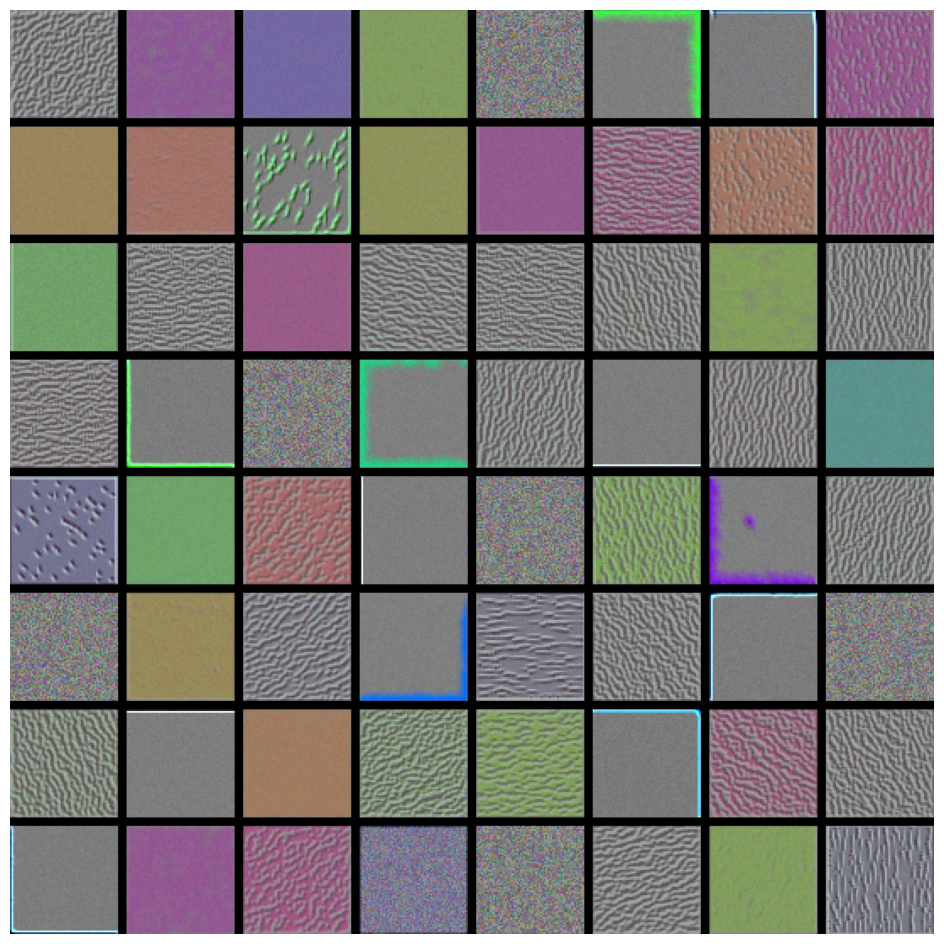

Шаблоны фильтров из слоя block2_conv1


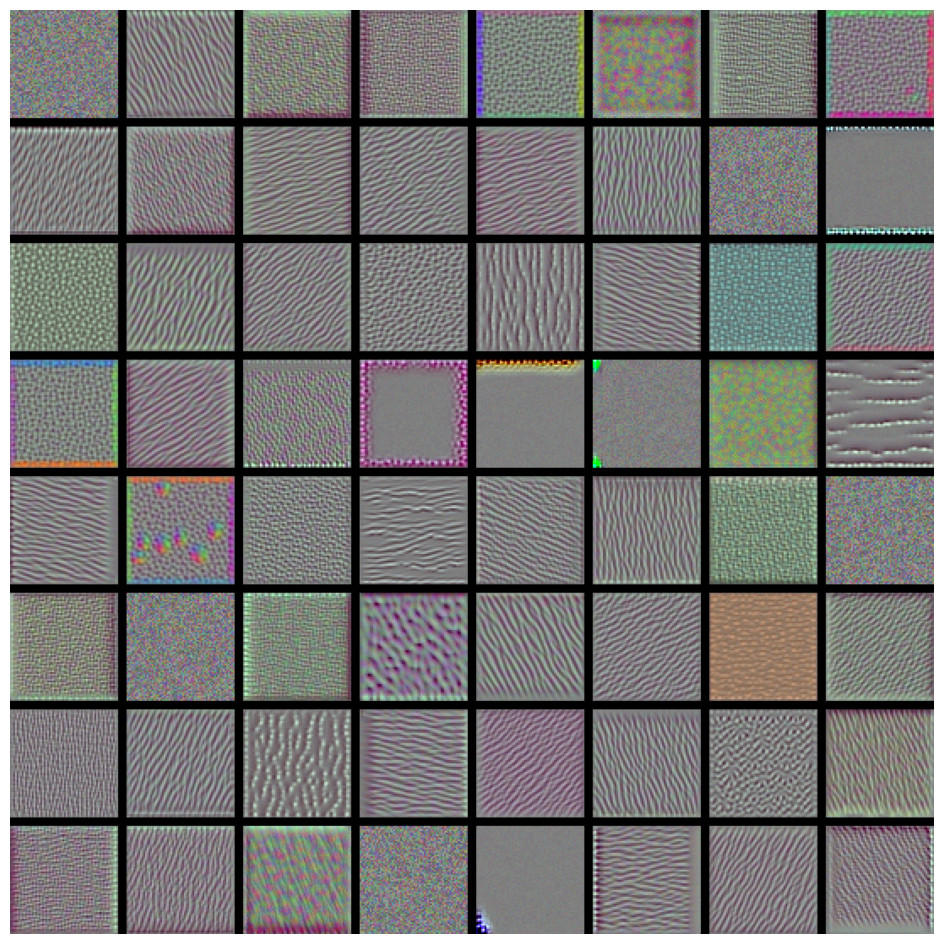

Шаблоны фильтров из слоя block3_conv1


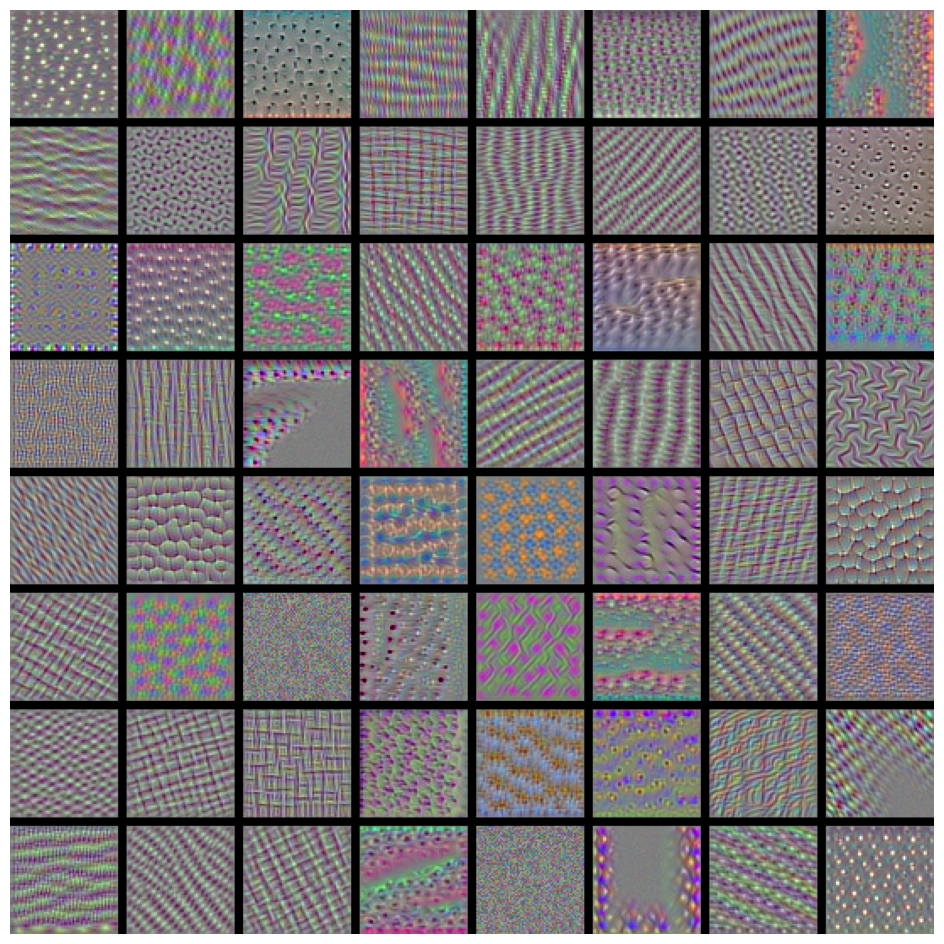

Шаблоны фильтров из слоя block4_conv1


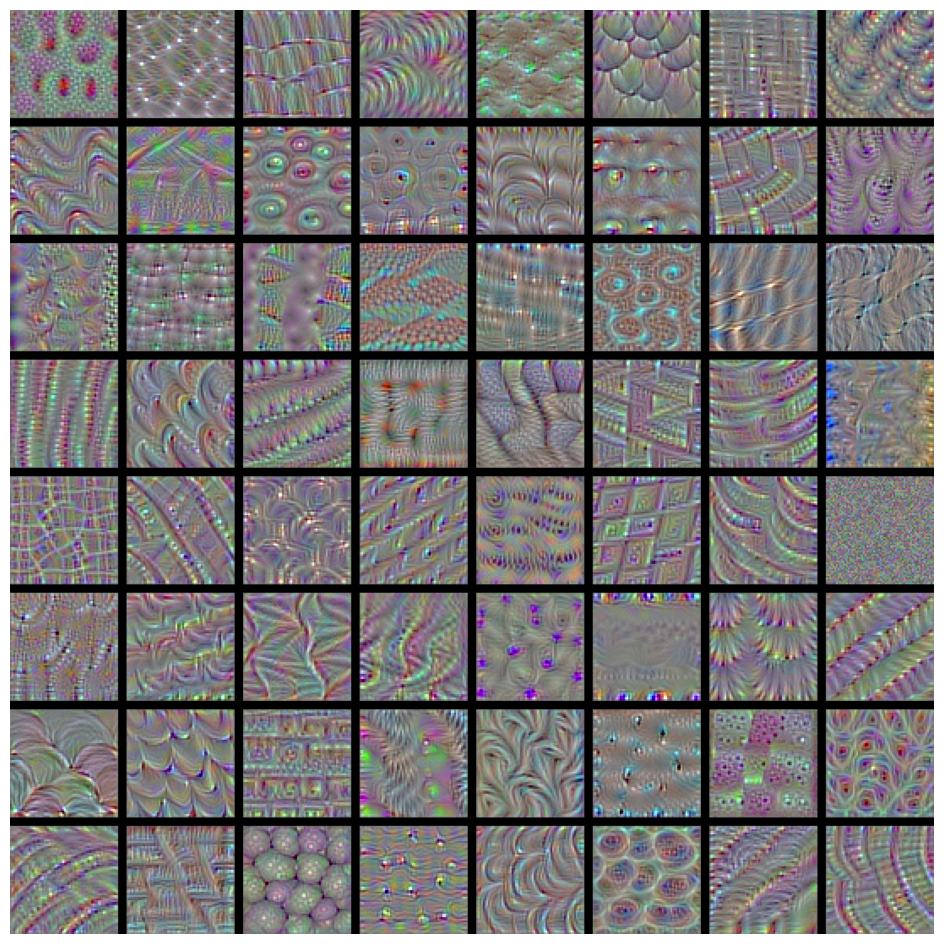

In [ ]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Загружаем модель VGG16
model = keras.applications.VGG16(weights='imagenet', include_top=False)

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=64):
    input_img_data = tf.Variable(np.random.random((1, size, size, 3)) * 20 + 128., dtype=tf.float32)
    step = 1.0
    activation_model = keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    for i in range(40):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            activation = activation_model(input_img_data)
            loss = tf.reduce_mean(activation[:, :, :, filter_index])
        grads = tape.gradient(loss, input_img_data)
        grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)
        input_img_data.assign_add(grads * step)
    img = input_img_data.numpy()[0]
    return deprocess_image(img)

def display_results(layer_name):
    # Параметры визуализации
    size = 64
    margin = 5
    print("Шаблоны фильтров из слоя", layer_name)
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype=np.uint8)
    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img
    plt.figure(figsize=(12, 12))
    plt.imshow(results)
    plt.axis('off')
    plt.show()
    
display_results('block1_conv1')
display_results('block2_conv1')
display_results('block3_conv1')
display_results('block4_conv1')